# Exercise: Statistical Analysis-2 

In the previous exercise, you used a simple regression model to assess the relationship between a response variable and one explanatory variable. Here, you will use multiple regression models, which contain more than one explanatory or predictor variable. 

When you finish this exercise, you will learn how to:
1. use multiple regression model
2. use the tidymodels package for statistical modeling 

Load the **tidyverse** package. 

In [1]:
# Load tidyverse
library(tidyverse)

── Attaching packages ──────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ─────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Tidymodels

The **[tidymodels](https://www.tidymodels.org/)** package contain functions for building models and performing statistical analyses, which can understand the language of **tidyverse**. This would make it easier for you to do modeling once your data is tidy.

Install and load the tidymodels package.

In [ ]:
# Install tidymodels
install.packages("tidymodels")

In [2]:
# Load tidymodels
library(tidymodels)

── Attaching packages ─────────────────────────────────── tidymodels 0.1.2 ──

✔ broom     0.7.2      ✔ recipes   0.1.15
✔ dials     0.0.9      ✔ rsample   0.0.9 
✔ infer     0.5.3      ✔ tune      0.1.3 
✔ modeldata 0.1.0      ✔ workflows 0.2.1 
✔ parsnip   0.1.5      ✔ yardstick 0.0.7 

── Conflicts ────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()



In [3]:
# Read the tidymodels documentation
help("tidymodels")

tidymodels-package {tidymodels},R Documentation


## COVID-19 case-fatality rate

You will continue using the COVID-19 data from [Our World in Data](https://ourworldindata.org/) to explore the demographic and socioeconomic factors that may influence COVID-19 case-fatality rate. Check the [codebook](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv) for the description of the different variables in this dataset.

In [18]:
# Import the COVID-19 data
link <- "https://covid.ourworldindata.org/data/owid-covid-data.csv"
cfr <- read_csv(link,
        col_types = cols(
            iso_code = col_character(),
            continent = col_character(),
            location = col_character(),
            date = col_date(format = ""),
            icu_patients = col_double(),
            icu_patients_per_million = col_double(),
            hosp_patients = col_double(),
            hosp_patients_per_million = col_double(),
            weekly_icu_admissions = col_double(),
            weekly_icu_admissions_per_million = col_double(),
            weekly_hosp_admissions = col_double(),
            weekly_hosp_admissions_per_million = col_double(),
            tests_units = col_character(),
            total_vaccinations = col_double(),
            people_vaccinated = col_double(),
            people_fully_vaccinated = col_double(),
            new_vaccinations = col_double(),
            new_vaccinations_smoothed = col_double(),
            total_vaccinations_per_hundred = col_double(),
            people_vaccinated_per_hundred = col_double(),
            new_vaccinations_smoothed_per_million = col_double(),
            people_fully_vaccinated_per_hundred = col_double()
        )
    )

In [19]:
# Check data structure
glimpse(cfr)

Rows: 74,210
Columns: 59
$ iso_code                              <chr> "AFG", "AFG", "AFG", "AFG", "AFG…
$ continent                             <chr> "Asia", "Asia", "Asia", "Asia", …
$ location                              <chr> "Afghanistan", "Afghanistan", "A…
$ date                                  <date> 2020-02-24, 2020-02-25, 2020-02…
$ total_cases                           <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 4,…
$ new_cases                             <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,…
$ new_cases_smoothed                    <dbl> NA, NA, NA, NA, NA, 0.143, 0.143…
$ total_deaths                          <dbl> NA, NA, NA, NA, NA, NA, NA, NA, …
$ new_deaths                            <dbl> NA, NA, NA, NA, NA, NA, NA, NA, …
$ new_deaths_smoothed                   <dbl> NA, NA, NA, NA, NA, 0, 0, 0, 0, …
$ total_cases_per_million               <dbl> 0.026, 0.026, 0.026, 0.026, 0.02…
$ new_cases_per_million                 <dbl> 0.026, 0.000, 0.000, 0.000, 0.00…
$ new_cases_smo

In [20]:
# Check the top and bottom rows
head(cfr)
tail(cfr)

iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,⋯,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AFG,Asia,Afghanistan,2020-02-24,1,1,NA,NA,NA,NA,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2020-02-25,1,0,NA,NA,NA,NA,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2020-02-26,1,0,NA,NA,NA,NA,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2020-02-27,1,0,NA,NA,NA,NA,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2020-02-28,1,0,NA,NA,NA,NA,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2020-02-29,1,0,0.143,NA,NA,0,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511


iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,⋯,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ZWE,Africa,Zimbabwe,2021-03-06,36260,12,28.857,1485,1,3.143,⋯,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
ZWE,Africa,Zimbabwe,2021-03-07,36271,11,26.000,1485,0,3.143,⋯,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
ZWE,Africa,Zimbabwe,2021-03-08,36289,18,24.857,1487,2,2.714,⋯,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
ZWE,Africa,Zimbabwe,2021-03-09,36321,32,24.714,1489,2,2.429,⋯,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
ZWE,Africa,Zimbabwe,2021-03-10,36341,20,23.143,1489,0,1.571,⋯,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
ZWE,Africa,Zimbabwe,2021-03-11,36377,36,22.000,1492,3,1.286,⋯,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


Perform data cleaning to remove rows that are not needed during statistical analysis. And then, create the outcome variable: `cfr`, which is the total number of deaths due to COVID-19 divided by the total number of confirmed COVID-19 cases multiplied by 100.

In [26]:
cfr <- cfr %>%
    # Subset latest data
    # filter(date == max(date))# %>%
    filter(date == '2021-03-11') %>%
    # Remove rows containing NAs in continent column 
    drop_na(continent) %>%
    # Create the outcome variable, CFR
    mutate(cfr = (total_deaths/total_cases)*100)
head(cfr)

iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,⋯,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,cfr
<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AFG,Asia,Afghanistan,2021-03-11,55917,23,20.286,2451,0,0.714,⋯,NA,597.029,9.59,NA,NA,37.746,0.50,64.83,0.511,4.383282
ALB,Europe,Albania,2021-03-11,115442,602,703.000,2002,16,18.000,⋯,1.1,304.195,10.08,7.1,51.2,NA,2.89,78.57,0.795,1.734204
DZA,Africa,Algeria,2021-03-11,114851,170,155.714,3028,2,3.714,⋯,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748,2.636459
AND,Europe,Andorra,2021-03-11,11130,0,22.000,112,0,0.000,⋯,NA,109.135,7.97,29.0,37.8,NA,NA,83.73,0.868,1.006289
AGO,Africa,Angola,2021-03-11,21205,44,32.000,517,1,0.857,⋯,NA,276.045,3.94,NA,NA,26.664,NA,61.15,0.581,2.438104
ATG,North America,Antigua and Barbuda,2021-03-11,882,0,9.857,23,0,0.286,⋯,NA,191.511,13.17,NA,NA,NA,3.80,77.02,0.778,2.607710


In [27]:
head(cfr)

iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,⋯,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,cfr
<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AFG,Asia,Afghanistan,2021-03-11,55917,23,20.286,2451,0,0.714,⋯,NA,597.029,9.59,NA,NA,37.746,0.50,64.83,0.511,4.383282
ALB,Europe,Albania,2021-03-11,115442,602,703.000,2002,16,18.000,⋯,1.1,304.195,10.08,7.1,51.2,NA,2.89,78.57,0.795,1.734204
DZA,Africa,Algeria,2021-03-11,114851,170,155.714,3028,2,3.714,⋯,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748,2.636459
AND,Europe,Andorra,2021-03-11,11130,0,22.000,112,0,0.000,⋯,NA,109.135,7.97,29.0,37.8,NA,NA,83.73,0.868,1.006289
AGO,Africa,Angola,2021-03-11,21205,44,32.000,517,1,0.857,⋯,NA,276.045,3.94,NA,NA,26.664,NA,61.15,0.581,2.438104
ATG,North America,Antigua and Barbuda,2021-03-11,882,0,9.857,23,0,0.286,⋯,NA,191.511,13.17,NA,NA,NA,3.80,77.02,0.778,2.607710


In [28]:
# Summary statistics of outcome variable
summary(cfr$cfr)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
 0.04828  1.10602  1.72000  2.09911  2.56444 25.00937       13 

## Multiple Linear Regression

Multiple regression is an extension of the simple linear regression, wherein the number of explanatory or predictor variables (**x<sub>1</sub>**, **x<sub>2</sub>**, **x<sub>3</sub>**, etc.) is increased for the outcome variable (**y**).

$$\hat{y} = \hat{\beta}_{0} + \hat{\beta}_{1}{x}_{1} + \hat{\beta}_{2}{x}_{2} + \hat{\beta}_{3}{x}_{3} + ... + \hat{\beta}_{n}{x}_{n} $$ 

The "hats" on top of the variables indicate that these are estimates. You may add it your equations to make it look fancy and intimidating to those who are having nosebleeds just by looking at the equation above. Recall from the lecture that in order for the model to work, this would depend on the following assumptions: the residuals are nearly normal distributed; the variance of the residuals is nearly constant; independent sampling; and since the equation is linear - each variable is linearly related to the outcome variable.

In this analysis, in addition to the proportion of smokers, you will include the following explanatory variables in your model: GDP per capita, population, population density, cardiovascular disease (CVD) death rate, and diabetes prevalence. 

In [42]:
# Subset the variables of interest
cfr_sub <- cfr %>%
    select(cfr, male_smokers, female_smokers, gdp_per_capita, population, 
           population_density, cardiovasc_death_rate, diabetes_prevalence)
head(cfr_sub)

cfr,male_smokers,female_smokers,gdp_per_capita,population,population_density,cardiovasc_death_rate,diabetes_prevalence
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.383282,NA,NA,1803.987,38928341,54.422,597.029,9.59
1.734204,51.2,7.1,11803.431,2877800,104.871,304.195,10.08
2.636459,30.4,0.7,13913.839,43851043,17.348,278.364,6.73
1.006289,37.8,29.0,NA,77265,163.755,109.135,7.97
2.438104,NA,NA,5819.495,32866268,23.890,276.045,3.94
2.607710,NA,NA,21490.943,97928,231.845,191.511,13.17


In [34]:
summary(cfr_sub)

      cfr            male_smokers   female_smokers  gdp_per_capita    
 Min.   : 0.04828   Min.   : 7.70   Min.   : 0.10   Min.   :   661.2  
 1st Qu.: 1.10602   1st Qu.:21.55   1st Qu.: 1.90   1st Qu.:  3821.2  
 Median : 1.72000   Median :31.40   Median : 6.05   Median : 11803.4  
 Mean   : 2.09911   Mean   :32.67   Mean   :10.43   Mean   : 18449.6  
 3rd Qu.: 2.56444   3rd Qu.:41.15   3rd Qu.:19.02   3rd Qu.: 26579.9  
 Max.   :25.00937   Max.   :78.10   Max.   :44.00   Max.   :116935.6  
 NA's   :13         NA's   :53      NA's   :51      NA's   :10        
   population        population_density cardiovasc_death_rate
 Min.   :8.090e+02   Min.   :    1.98   Min.   : 79.37       
 1st Qu.:2.083e+06   1st Qu.:   36.25   1st Qu.:170.98       
 Median :8.947e+06   Median :   83.48   Median :245.06       
 Mean   :4.018e+07   Mean   :  356.48   Mean   :263.76       
 3rd Qu.:2.914e+07   3rd Qu.:  208.35   3rd Qu.:333.91       
 Max.   :1.439e+09   Max.   :19347.50   Max.   :724.42      

### Data transformation

Notice that the numbers in the population column are big. Rescaling variables will ensure that the magnitude of the values of a particular variable will not dominate during modelling. There are several ways of rescaling data including standardization of the values such that it is mean-centered with a value of zero and a standard deviation of one. Another method is to transform the variable to logarithmic scale.

In [43]:
cfr_sub <- cfr_sub %>% mutate_at(
    c("male_smokers", "female_smokers", "gdp_per_capita", "population", "population_density", "cardiovasc_death_rate", "diabetes_prevalence"), 
    log)
summary(cfr_sub)

      cfr            male_smokers   female_smokers    gdp_per_capita  
 Min.   : 0.04828   Min.   :2.041   Min.   :-2.3026   Min.   : 6.494  
 1st Qu.: 1.10602   1st Qu.:3.070   1st Qu.: 0.6419   1st Qu.: 8.248  
 Median : 1.72000   Median :3.447   Median : 1.7997   Median : 9.376  
 Mean   : 2.09911   Mean   :3.392   Mean   : 1.6328   Mean   : 9.222  
 3rd Qu.: 2.56444   3rd Qu.:3.717   3rd Qu.: 2.9457   3rd Qu.:10.188  
 Max.   :25.00937   Max.   :4.358   Max.   : 3.7842   Max.   :11.669  
 NA's   :13         NA's   :53      NA's   :51        NA's   :10      
   population     population_density cardiovasc_death_rate diabetes_prevalence
 Min.   : 6.696   Min.   :0.6831     Min.   :4.374         Min.   :-0.01005   
 1st Qu.:14.550   1st Qu.:3.5905     1st Qu.:5.142         1st Qu.: 1.66770   
 Median :16.007   Median :4.4246     Median :5.502         Median : 1.96150   
 Mean   :15.667   Mean   :4.4116     Mean   :5.468         Mean   : 1.93156   
 3rd Qu.:17.188   3rd Qu.:5.3392     

Visualize the correlation matrix using the **`chart.Correlation( )`** function of **PerformceAnalytics** package.

In [63]:
# Install the package
install.packages("PerformanceAnalytics")
# Load the package
library(PerformanceAnalytics)


Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend




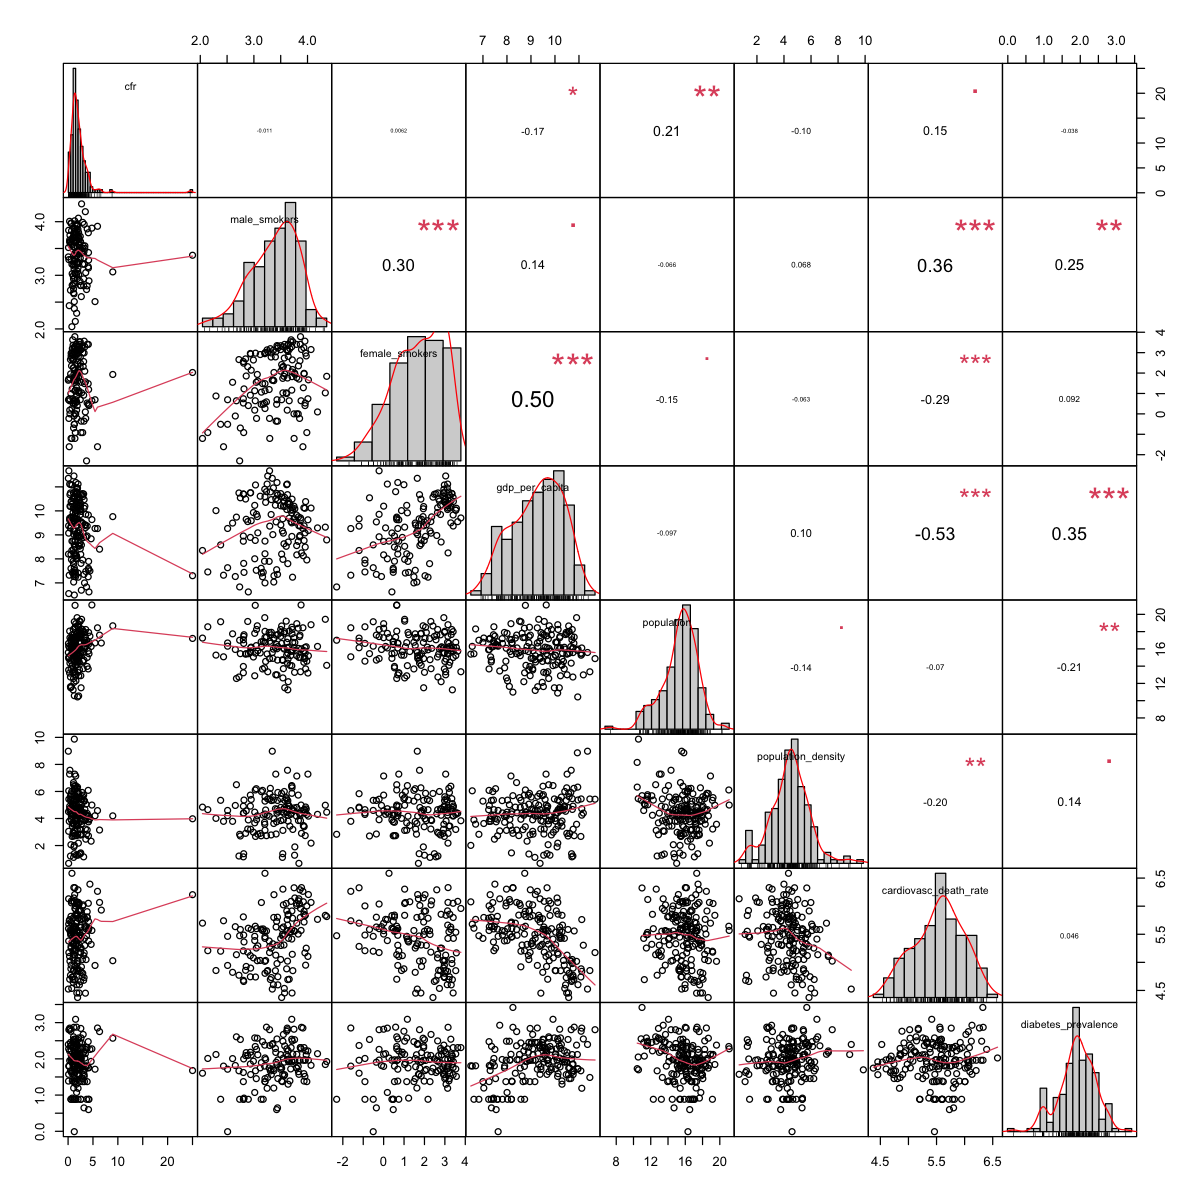

In [70]:
options(repr.plot.width = 10, repr.plot.height = 10)
chart.Correlation(cfr_sub, histogram = TRUE)

The pairwise correlation plot above gives you an idea on the relationships of the variables in your dataset. Here, the lower half triangle visualizes the scatter plot of variables with regression line; the identity diagonal shows the histogram plot of the distribution of values in that particular variable; and the upper right triangle shows the correlation coefficient values with asterisks indicating the strength of correlation.

### Model instantiation

Using the **tidymodels** approach, the first step is to specify the type of model. Recall that when using base R, the function for linear regression is **`lm( )`**. In **tidymodels**, the equivalent function is **`linear_reg( )`**. Set the `mode` argument to **`regression`** since you will be doing a regression analysis. The other mode would be **`classification`**. Do not worry about this for now, you will encounter this in the next exercise. The **`set_engine( )`** is used to specify the algorithm in fitting the model.

In [44]:
lm_model <- linear_reg(mode = "regression") %>%
                set_engine("lm")

### Model formula

Create a formula vector describing the outcome variable and explanatory variables of the model. The general form below will not induce much nose bleeding.

$$ {outcome} = {variable}_{1} + {variable}_{2} + {variable}_{3} + {variable}_{n}  $$

In [50]:
formula <- cfr ~ male_smokers + female_smokers + gdp_per_capita + population + population_density + 
            cardiovasc_death_rate + diabetes_prevalence

### Model fitting

Use the **`fit( )`** function for run the model.

In [52]:
lm_fit <- lm_model %>%
            fit(formula, data = cfr_sub)
lm_fit

parsnip model object

Fit time:  2ms 

Call:
stats::lm(formula = cfr ~ male_smokers + female_smokers + gdp_per_capita + 
    population + population_density + cardiovasc_death_rate + 
    diabetes_prevalence, data = data)

Coefficients:
          (Intercept)           male_smokers         female_smokers  
              1.13391               -0.31508                0.36208  
       gdp_per_capita             population     population_density  
             -0.55152                0.26151               -0.09325  
cardiovasc_death_rate    diabetes_prevalence  
              0.41485                0.31133  


Results of the model can be accessed using the **`pluck( )`** function and summarized using the **`summary( )`** function.

In [55]:
lm_model_res <- lm_fit %>% 
                    pluck("fit") %>% 
                    summary()
lm_model_res


Call:
stats::lm(formula = cfr ~ male_smokers + female_smokers + gdp_per_capita + 
    population + population_density + cardiovasc_death_rate + 
    diabetes_prevalence, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7835 -1.0537 -0.1534  0.4905 21.0040 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)  
(Intercept)            1.13391    5.06975   0.224   0.8234  
male_smokers          -0.31508    0.57661  -0.546   0.5857  
female_smokers         0.36208    0.17951   2.017   0.0458 *
gdp_per_capita        -0.55152    0.26643  -2.070   0.0405 *
population             0.26151    0.11474   2.279   0.0243 *
population_density    -0.09325    0.15843  -0.589   0.5572  
cardiovasc_death_rate  0.41485    0.62783   0.661   0.5100  
diabetes_prevalence    0.31133    0.45636   0.682   0.4964  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.294 on 126 degrees of freedom
  (59 observations deleted due to

The model parameter estimates and p-values can be accessed using the **`coef( )`** function.

In [54]:
param_est <- coef(lm_model_res)
param_est

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.13391457,5.0697538,0.2236626,0.82338204
male_smokers,-0.31507906,0.5766099,-0.5464337,0.58573417
female_smokers,0.36208356,0.1795066,2.0171050,0.04580954
gdp_per_capita,-0.55152249,0.2664282,-2.0700602,0.04048956
population,0.26151437,0.1147389,2.2792128,0.02433655
population_density,-0.09325049,0.1584303,-0.5885901,0.55718993
cardiovasc_death_rate,0.41485395,0.6278334,0.6607707,0.50996567
diabetes_prevalence,0.31132672,0.4563560,0.6822014,0.49636381


From the results, the proportion of female smokers, GDP per capita, and population are statistically significant. What is your interpretation of these results?

In [57]:
# What is your interpretation about the proportion of female smokers and COVID-19 case-fatality rate?
# Answer: ____

In [58]:
# What is your interpretation about the GDP per capita and COVID-19 case-fatality rate?
# Answer: ____

## Model selection

From the lecture, there are two ways of selecting a model, namely backward elimination and forward selection. During model selection, adjusted R<sup>2</sup>, p-value, or Akaike Criterion Information is used as metric to selection. Play around with the different variables in the COVID-19 case-fatality rate data to find the best-fit model using model selection method of your choice.

In [72]:
# Write your code below for model selection
